# ICS 491 Project: Acne Scar Classification
Note: This notebook was run using Jupyter Notebook

## Install Dependencies

In [ ]:
!pip install tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.1 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.23.4 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.4 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.4 which is incompatible.


  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)


## Load Dataset
Place dataset inside folder named "data", adjacent to this Python Notebook

Dataset from: https://drive.google.com/drive/folders/1ODtm94Wz1OXT6vNvO8UhcdBPYeE2VWzR

For consistency with this notebook, rename all subfolders in the dataset to be one-word and lowercase.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
data = image_dataset_from_directory('data', label_mode='categorical')

Found 250 files belonging to 5 classes.


## Preprocess Dataset

### Scale Dataset

In [ ]:
# Map all RGB values from 0 to 1 scale
data = data.map(lambda x, y: (x / 255, y))

### Split Dataset

In [ ]:
# 8 batches
train_size = 5 # 70%
validation_size = 2 # 20%
test_size = 1 # 10%

In [ ]:
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

## Deep Learning

### Build Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

In [ ]:
# AlexNet
model = Sequential()

model.add(InputLayer(input_shape=(256, 256, 3)))

model.add(Conv2D(128, (11, 11), strides=(4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001),
          loss=CategoricalCrossentropy(from_logits=False),
          metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 128)       46592     
                                                                 
 batch_normalization_5 (Bat  (None, 62, 62, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 256)       819456    
                                                                 
 batch_normalization_6 (Bat  (None, 31, 31, 256)       1024      
 chNormalization)                                                
                                                      

### Train CNN

In [ ]:
hist = model.fit(train, epochs=150, validation_data=validation)

Epoch 1/150
5/5 [==============================] - 18s 3s/step - loss: 3.0850 - accuracy: 0.2188 - val_loss: 1.6099 - val_accuracy: 0.2344
Epoch 2/150
5/5 [==============================] - 14s 3s/step - loss: 2.8371 - accuracy: 0.2438 - val_loss: 1.6049 - val_accuracy: 0.2969
Epoch 3/150
5/5 [==============================] - 13s 2s/step - loss: 2.7338 - accuracy: 0.1937 - val_loss: 1.6039 - val_accuracy: 0.2031
Epoch 4/150
5/5 [==============================] - 13s 2s/step - loss: 2.7390 - accuracy: 0.2438 - val_loss: 1.6017 - val_accuracy: 0.2656
Epoch 5/150
5/5 [==============================] - 14s 3s/step - loss: 2.3781 - accuracy: 0.3187 - val_loss: 1.6147 - val_accuracy: 0.2188
Epoch 6/150
5/5 [==============================] - 14s 3s/step - loss: 2.8246 - accuracy: 0.2438 - val_loss: 1.6166 - val_accuracy: 0.1094
Epoch 7/150
5/5 [==============================] - 13s 3s/step - loss: 2.3061 - accuracy: 0.2750 - val_loss: 1.6005 - val_accuracy: 0.2188
Epoch 8/150
5/5 [==========

5/5 [==============================] - 13s 3s/step - loss: 0.9297 - accuracy: 0.6062 - val_loss: 1.5536 - val_accuracy: 0.3281
Epoch 60/150
5/5 [==============================] - 13s 3s/step - loss: 0.8850 - accuracy: 0.7125 - val_loss: 1.3825 - val_accuracy: 0.4531
Epoch 61/150
5/5 [==============================] - 14s 3s/step - loss: 0.8825 - accuracy: 0.6812 - val_loss: 1.3906 - val_accuracy: 0.4219
Epoch 62/150
5/5 [==============================] - 13s 2s/step - loss: 0.8534 - accuracy: 0.6500 - val_loss: 1.2921 - val_accuracy: 0.4219
Epoch 63/150
5/5 [==============================] - 12s 2s/step - loss: 0.6966 - accuracy: 0.7375 - val_loss: 1.3938 - val_accuracy: 0.3594
Epoch 64/150
5/5 [==============================] - 13s 3s/step - loss: 0.8579 - accuracy: 0.6750 - val_loss: 1.2902 - val_accuracy: 0.4531
Epoch 65/150
5/5 [==============================] - 13s 2s/step - loss: 0.8523 - accuracy: 0.6500 - val_loss: 1.3401 - val_accuracy: 0.4219
Epoch 66/150
5/5 [===============

5/5 [==============================] - 14s 3s/step - loss: 0.4330 - accuracy: 0.8375 - val_loss: 0.2328 - val_accuracy: 0.9531
Epoch 118/150
5/5 [==============================] - 13s 3s/step - loss: 0.3299 - accuracy: 0.8875 - val_loss: 0.3091 - val_accuracy: 0.9375
Epoch 119/150
5/5 [==============================] - 13s 3s/step - loss: 0.3243 - accuracy: 0.9187 - val_loss: 0.2032 - val_accuracy: 0.9844
Epoch 120/150
5/5 [==============================] - 13s 3s/step - loss: 0.4614 - accuracy: 0.8375 - val_loss: 0.2597 - val_accuracy: 0.9375
Epoch 121/150
5/5 [==============================] - 13s 2s/step - loss: 0.4451 - accuracy: 0.8625 - val_loss: 0.2105 - val_accuracy: 0.9844
Epoch 122/150
5/5 [==============================] - 13s 3s/step - loss: 0.4799 - accuracy: 0.8313 - val_loss: 0.2140 - val_accuracy: 0.9688
Epoch 123/150
5/5 [==============================] - 14s 3s/step - loss: 0.3709 - accuracy: 0.8625 - val_loss: 0.1929 - val_accuracy: 1.0000
Epoch 124/150
5/5 [========

### Plot Performance

In [ ]:
from matplotlib import pyplot as plt

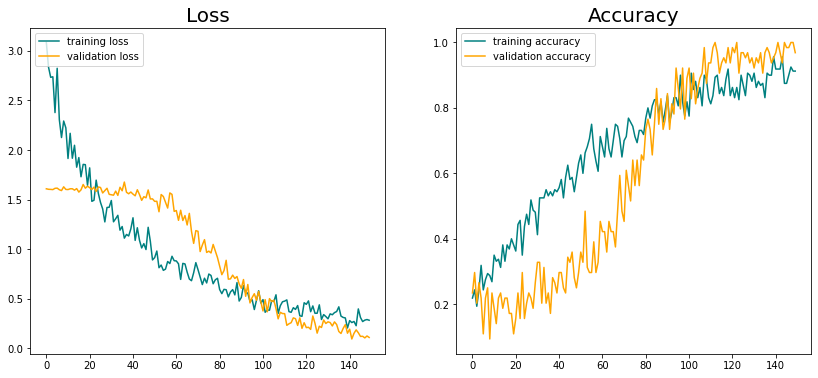

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Loss', fontsize=20)
ax1.plot(hist.history['loss'], color='teal', label='training loss')
ax1.plot(hist.history['val_loss'], color='orange', label='validation loss')
ax1.legend(loc='upper left')

ax2.set_title('Accuracy', fontsize=20)
ax2.plot(hist.history['accuracy'], color='teal', label='training accuracy')
ax2.plot(hist.history['val_accuracy'], color='orange', label='validation accuracy')
ax2.legend(loc='upper left')

## Test CNN

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 914ms/step


### Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
labels = ['boxcar', 'hypertrophic', 'icepick', 'keloid', 'rolling']
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(y_pred, axis=1), target_names=labels))

              precision    recall  f1-score   support

      boxcar       1.00      1.00      1.00         2
hypertrophic       0.78      1.00      0.88         7
     icepick       1.00      1.00      1.00         6
      keloid       1.00      0.67      0.80         6
     rolling       1.00      1.00      1.00         5

    accuracy                           0.92        26
   macro avg       0.96      0.93      0.93        26
weighted avg       0.94      0.92      0.92        26



### ROC Curve

In [ ]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

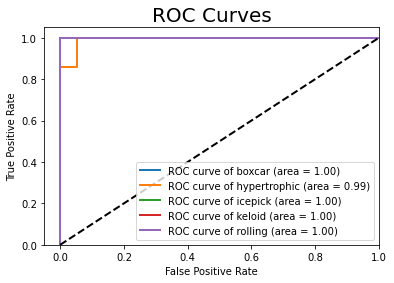

In [ ]:
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(1)
for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of {labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves', fontsize=20)
plt.legend(loc='lower right')
plt.show()